## Begin

#### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
##### BoomBikes want to understand:
* The factors affecting the demand for these shared bikes in the American market:
* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands
##### Business Goal:
* Create model the demand for shared bikes and It will be used by the management to understand how exactly the demands vary with different features. 
* They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.

Importing Required Libraries

In [1]:
import calendar

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Reading data and getting basic data understanding 

In [2]:
df_bike = pd.read_csv("day.csv")

In [3]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df_bike.shape

(730, 16)

In [5]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Data Set contains 730 rows and 16 columns
##### There is no null in any of the columns

### Cleaning the Data

In [8]:
# renaming few columns for better readibility

df_bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt': 'total_count', 'weathersit':'weather'}, inplace=True)

In [9]:
df_bike.nunique()

instant        730
dteday         730
season           4
year             2
month           12
holiday          2
weekday          7
workingday       2
weather          3
temp           498
atemp          689
humidity       594
windspeed      649
casual         605
registered     678
total_count    695
dtype: int64

In [10]:
#Dropping columns which is not required for analysis 

# instant has only index for the row, dteday has date which is redundant since year ,nonth column available
# casual and registered seems to be the breakup by category for cnt column.

df_bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [11]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    int64  
 1   year         730 non-null    int64  
 2   month        730 non-null    int64  
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    int64  
 5   workingday   730 non-null    int64  
 6   weather      730 non-null    int64  
 7   temp         730 non-null    float64
 8   atemp        730 non-null    float64
 9   humidity     730 non-null    float64
 10  windspeed    730 non-null    float64
 11  total_count  730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


* Few columns like season ,year data type seems not correct ,will change is required later.
* No Null Value in Dataset

In [12]:
df_bike.nunique()

season           4
year             2
month           12
holiday          2
weekday          7
workingday       2
weather          3
temp           498
atemp          689
humidity       594
windspeed      649
total_count    695
dtype: int64

In [13]:
df_bike.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,total_count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
df_bike.nunique()

season           4
year             2
month           12
holiday          2
weekday          7
workingday       2
weather          3
temp           498
atemp          689
humidity       594
windspeed      649
total_count    695
dtype: int64

#### Outlier Analysis and Treatment and Distribution Analysis of Columns : temp, atemp,windspeed,humidity


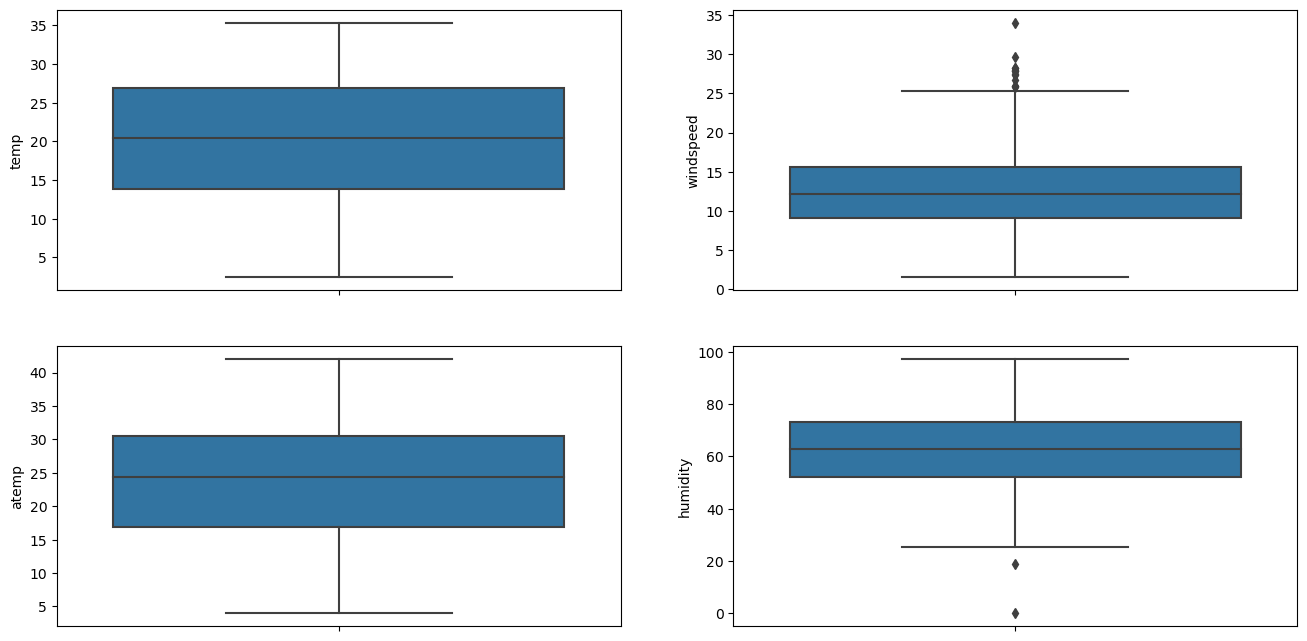

In [15]:
fig, p = plt.subplots(2,2, figsize=(16, 8))
sns.boxplot(y='temp', data= df_bike, ax=p[0][0])
sns.boxplot(y='atemp', data= df_bike, ax=p[1][0])
sns.boxplot(y='windspeed', data= df_bike, ax=p[0][1])
sns.boxplot(y='humidity', data= df_bike, ax=p[1][1])
plt.show()

In [16]:
#### No Significant outlier so continuing for further data analysis.

In [17]:
df_bike.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,total_count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Converting season ,month,weekday and weather to categorial types

In [18]:
df_bike.loc[:, 'weather'] = df_bike['weather'].map({1:'good',2:'moderate',3:'bad',4:'severe'})
df_bike.loc[:, 'month'] = df_bike['month'].map({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
df_bike.loc[:, 'weekday'] = df_bike['weekday'].map({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df_bike.loc[:, 'season'] = df_bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})


In [19]:
df_bike.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,total_count
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


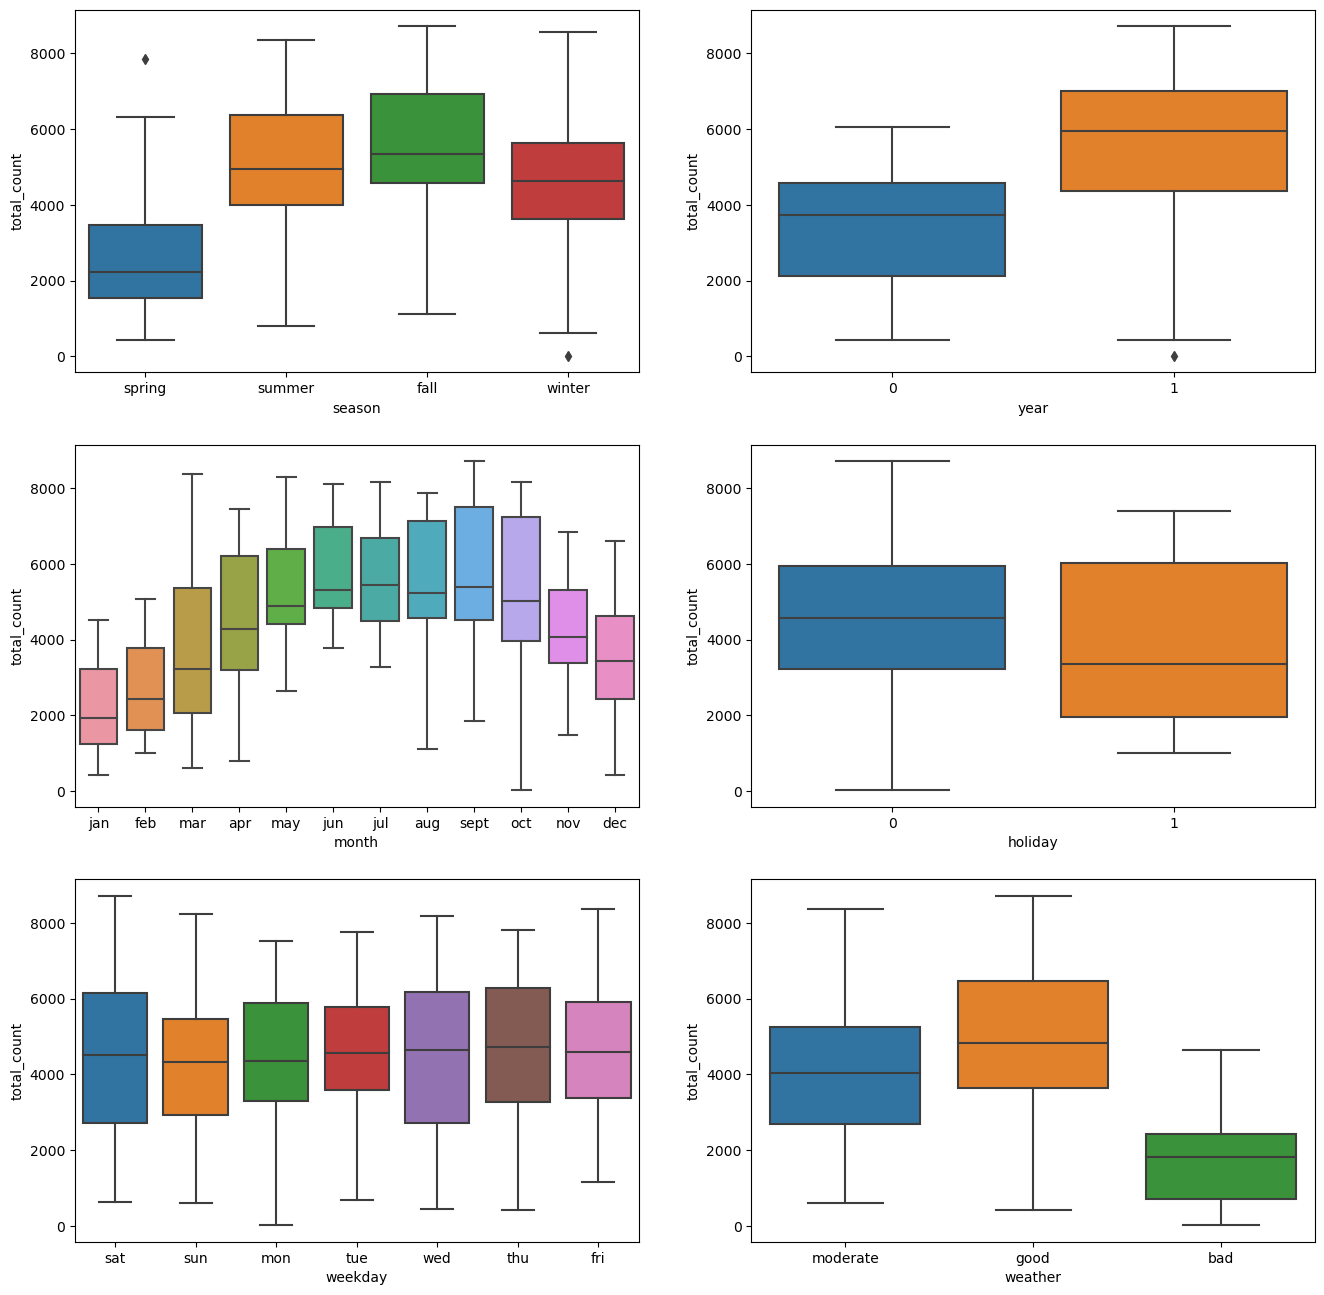

In [20]:
# Analysis of Total Count bu following categorial columns given in list to get more insight
List1=['season','year','month','holiday','weekday','weather']
fig, p = plt.subplots(3,2, figsize=(16, 16))
for i in enumerate(List1):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(data=df_bike, x=i[1], y='total_count')
plt.show()

### Observations

* Rental bike demand increases in fall season.
* Rental bike demand is more in 2nd year.
* Bike Demand is highest in Aug,Sep and Oct month
* Less demand on Holiday.
* Demand on Thursday is highest however not much variation in demand by weekdays.
* Good weather has highest demand.

<Figure size 2000x3000 with 0 Axes>

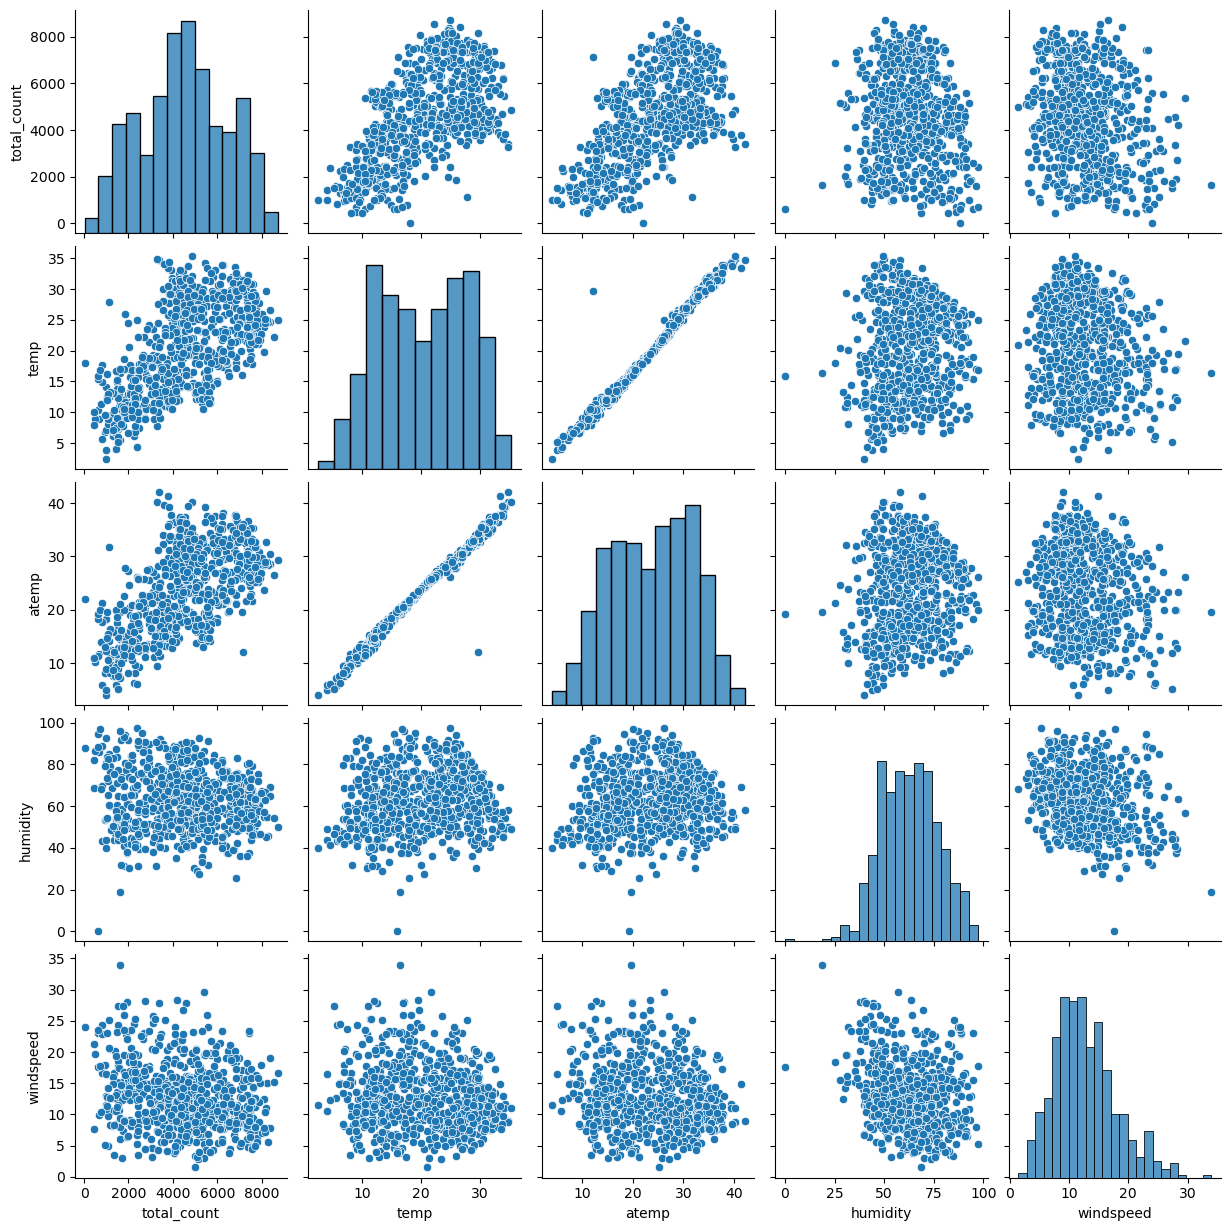

In [21]:
#Idenfying linear relation between continuous numeric variables
plt.figure(figsize = (20,30))
sns.pairplot(data=df_bike,vars=['total_count', 'temp', 'atemp', 'humidity','windspeed'])
plt.show()

#### temp and atemp has the highest corelation with the target variable total_count and they are highly co-related with each other

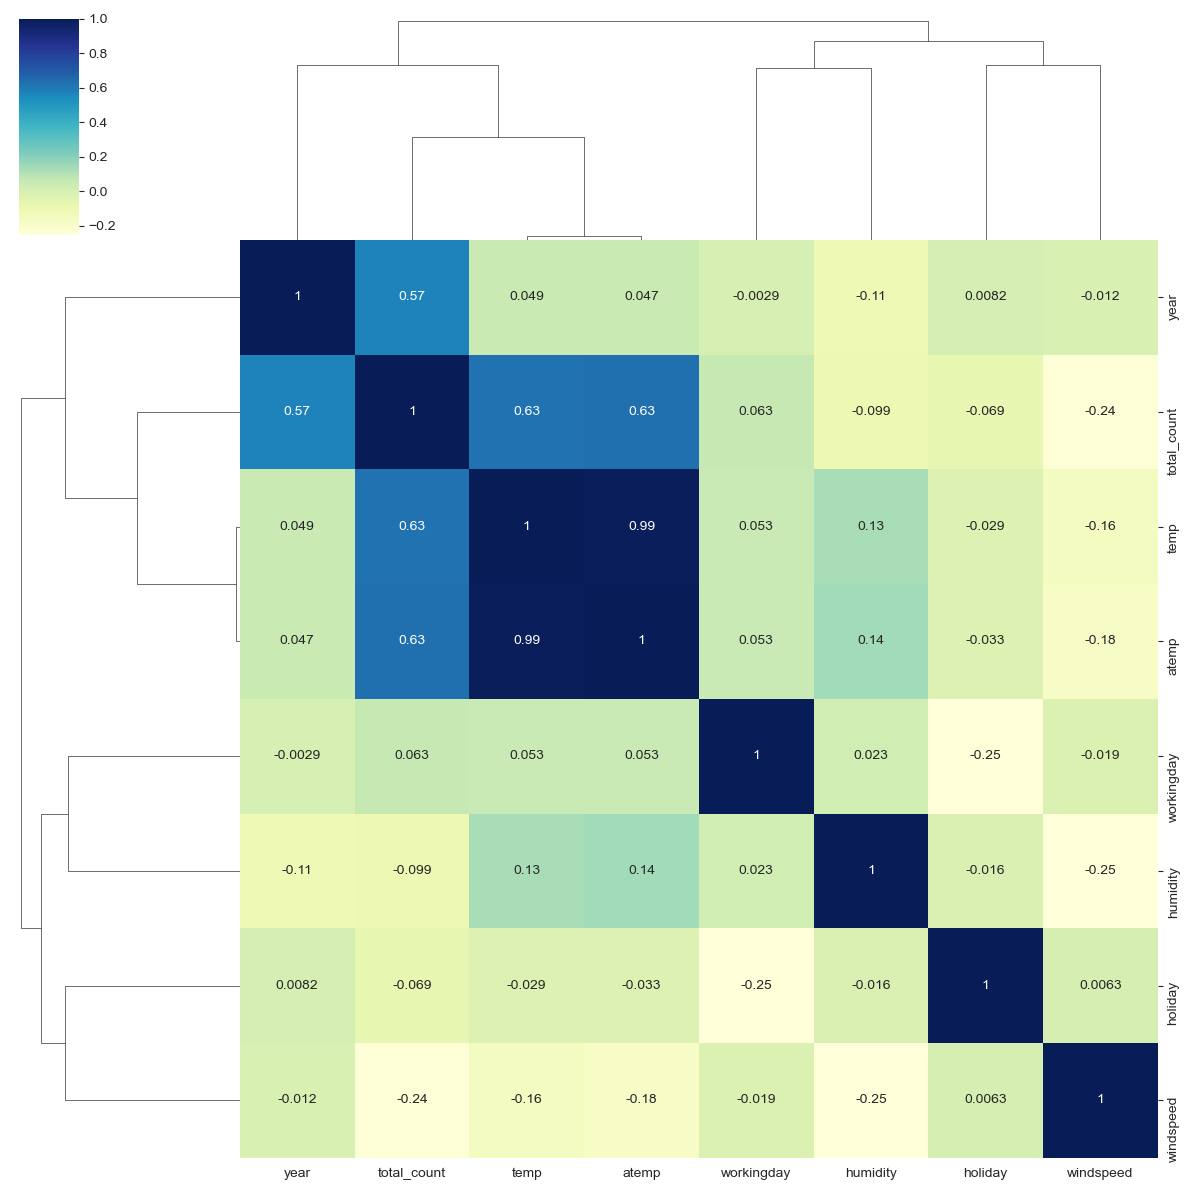

In [22]:
#Co relation Analysis ofdifferent variables
sns.set_style("whitegrid")
sns.clustermap(data=df_bike.corr(),cmap='YlGnBu', annot = True, figsize=(12,12))
plt.show()

#### temp and atemp co-relation is highest and also highly co related with target variable total count
#### There is linear relationship between temp and atemp. keeping both parameters not required due to multicolinearity. need to check later based on VIF and p-value .

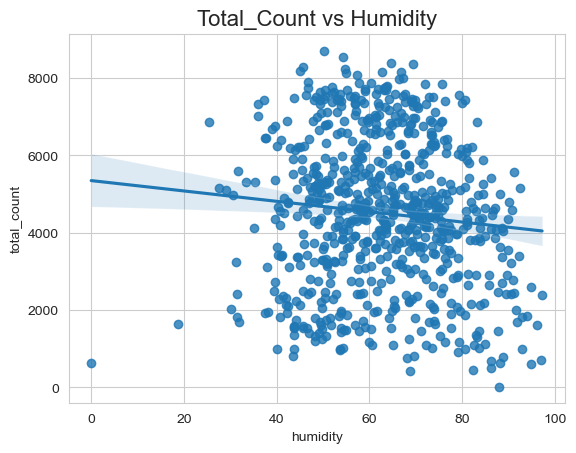

In [23]:
#Checking total_count linera relation with other numeric variables
sns.regplot(df_bike, x='humidity', y='total_count')
plt.title("Total_Count vs Humidity",fontsize=16)
plt.show()

* Humidity data is scattered but increment in humidity affecting bike demand negatively .

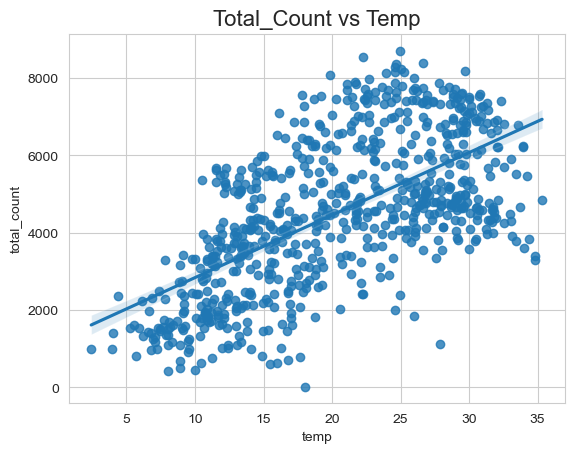

In [24]:
sns.regplot(df_bike, x='temp', y='total_count')
plt.title("Total_Count vs Temp",fontsize=16)
plt.show()

* Bike demand is positively co-related with temp increase .

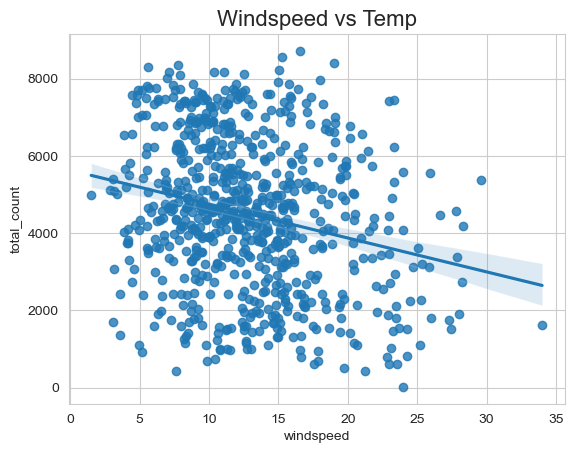

In [25]:
sns.regplot(df_bike, x='windspeed', y='total_count')
plt.title("Windspeed vs Temp",fontsize=16)
plt.show()

* Windspeed data is scattered but increment in humidity affecting bike demand negatively .

### With above data and relationship between independent and target variable it is observed that Linear regression model can be built 

#### Data Preparation for Linear Regression

#### Now will create dummy variables for all categorical variables and dropping the first columns

In [26]:
months_df=pd.get_dummies(df_bike.month,drop_first=True)
weekdays_df=pd.get_dummies(df_bike.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df_bike.weather,drop_first=True)
seasons_df=pd.get_dummies(df_bike.season,drop_first=True)

In [27]:
df_bike.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,total_count
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [28]:
#Concatenating dummy variables to main DF
df_bike = pd.concat([df_bike,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [29]:
#DF after merge
df_bike.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,...,0,0,0,0,0,1,0,1,0,0
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,...,0,0,0,1,0,1,0,1,0,0
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,...,0,0,0,0,1,1,0,1,0,0


In [30]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   year         730 non-null    int64  
 2   month        730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weather      730 non-null    object 
 7   temp         730 non-null    float64
 8   atemp        730 non-null    float64
 9   humidity     730 non-null    float64
 10  windspeed    730 non-null    float64
 11  total_count  730 non-null    int64  
 12  aug          730 non-null    uint8  
 13  dec          730 non-null    uint8  
 14  feb          730 non-null    uint8  
 15  jan          730 non-null    uint8  
 16  jul          730 non-null    uint8  
 17  jun          730 non-null    uint8  
 18  mar          730 non-null    uint8  
 19  may     

In [31]:
# dSice we already have dummy variables so dropping previous corresponding columns.

df_bike.drop(['season','month','weekday','weather'], axis = 1, inplace = True)

In [32]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         730 non-null    int64  
 1   holiday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   temp         730 non-null    float64
 4   atemp        730 non-null    float64
 5   humidity     730 non-null    float64
 6   windspeed    730 non-null    float64
 7   total_count  730 non-null    int64  
 8   aug          730 non-null    uint8  
 9   dec          730 non-null    uint8  
 10  feb          730 non-null    uint8  
 11  jan          730 non-null    uint8  
 12  jul          730 non-null    uint8  
 13  jun          730 non-null    uint8  
 14  mar          730 non-null    uint8  
 15  may          730 non-null    uint8  
 16  nov          730 non-null    uint8  
 17  oct          730 non-null    uint8  
 18  sept         730 non-null    uint8  
 19  mon     

In [33]:
df_bike.shape

(730, 30)

In [34]:
# splitting the dataframe into Train and Test

np.random.seed(0)
X_train, X_test = train_test_split(df_bike, train_size = 0.7, random_state = 100)

In [35]:
# check the shape of training datatset

X_train.shape

(510, 30)

In [36]:
# check the shape of testing datatset

X_test.shape

(220, 30)

In [37]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()
# verifying the head of dataset before scaling.

X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,total_count,aug,dec,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,1,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,1,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


#### Scaling continuous variables to make all features in same scale to interpret easily

In [38]:
# Applying scaler() to continuous variables
num_vars = ['temp','atemp','humidity','windspeed','total_count']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])



In [39]:
# Lets look at overall data post scaling.

X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,total_count,aug,dec,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,1,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [40]:
# describing the dataset

X_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,total_count,aug,dec,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


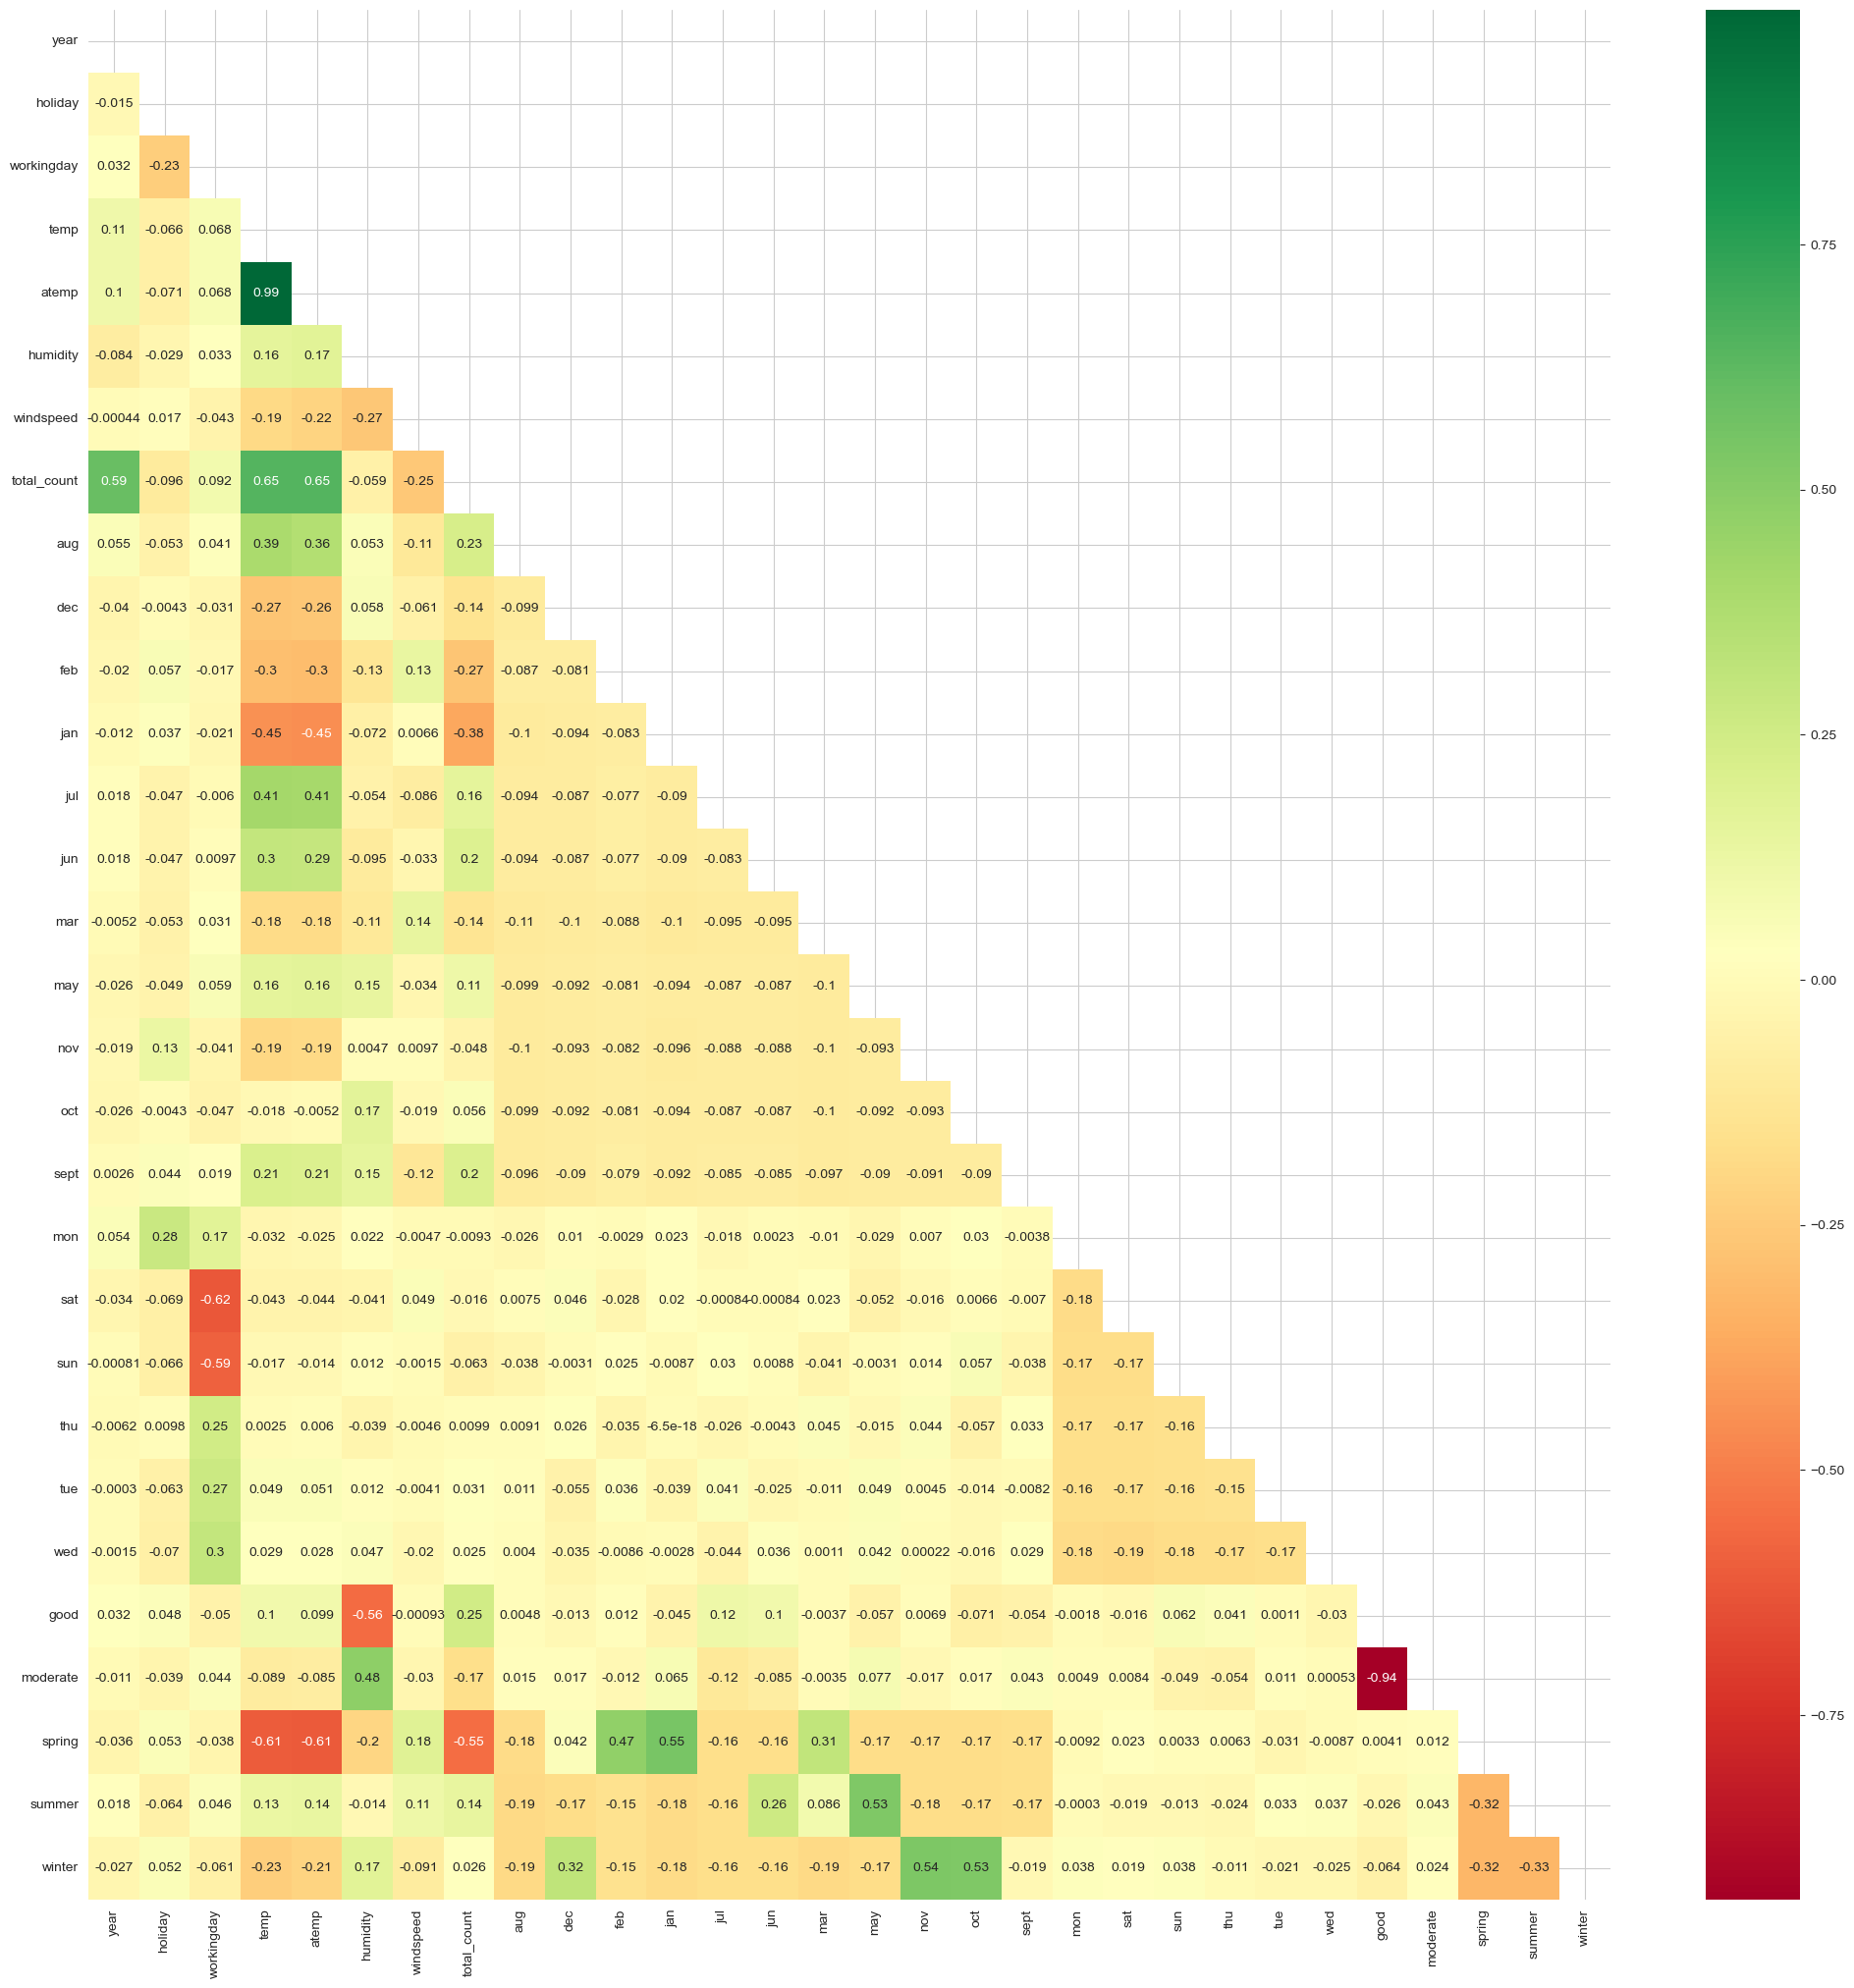

In [41]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(X_train.corr())
sns.heatmap(X_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

#### Observation :
* Temp and atemp show correlation. 
* Moderate and humidity show correlation. 
* Spring season with Jan and Feb month
* Summer season with may month 
* Winter season with oct and nov month show good correlation.

In [42]:
# Building the Linear Model

y_train = X_train.pop('total_count')


In [43]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [44]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sept', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('good', True, 1),
 ('moderate', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [45]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'jul', 'sept', 'sat', 'good', 'moderate', 'spring', 'summer', 'winter'],
      dtype='object')


In [46]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [47]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [48]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [49]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
4,humidity,25.63
3,temp,22.84
10,good,14.80
11,moderate,9.07
12,spring,5.69
2,workingday,5.42
5,windspeed,4.69
14,winter,4.12
13,summer,3.21
0,year,2.10


## Model Building

In [50]:
# Building 1st linear regression model

X_train_lmdl_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lmdl_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          4.22e-191
Time:                        15:07:59   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.048      0.092      0.9

In [51]:
# Dropping Humidity due to high VIF
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
9,good,14.79
3,temp,13.96
10,moderate,8.48
2,workingday,5.34
4,windspeed,4.67
11,spring,4.48
12,summer,2.79
13,winter,2.74
0,year,2.08
8,sat,1.99


In [52]:
# As Good shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['good'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.06
2,workingday,5.22
4,windspeed,4.62
10,spring,3.07
11,summer,2.34
0,year,2.07
8,sat,1.96
12,winter,1.96
5,jan,1.62
6,jul,1.59


In [53]:
# Building 2nd linear regression model

X_train_lmdl_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lmdl_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.1
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.07e-162
Time:                        15:07:59   Log-Likelihood:                 445.86
No. Observations:                 510   AIC:                            -863.7
Df Residuals:                     496   BIC:                            -804.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1652      0.036      4.630      0.0

In [54]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,6.96
2,workingday,5.19
4,windspeed,4.60
9,spring,2.49
10,summer,2.34
0,year,2.06
11,winter,1.96
7,sat,1.95
5,jul,1.58
8,moderate,1.54


In [55]:
# Building 3rd linear regression model

X_train_lmdl_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lmdl_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     161.7
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          6.82e-163
Time:                        15:07:59   Log-Likelihood:                 444.35
No. Observations:                 510   AIC:                            -862.7
Df Residuals:                     497   BIC:                            -807.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1512      0.035      4.345      0.0

In [56]:
# Dropping 'jul' as it has high p-value
X_train_new = X_train_new.drop(['jul'], axis = 1)

# Output of Function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,5.70
2,workingday,5.19
4,windspeed,4.59
8,spring,2.40
0,year,2.06
9,summer,2.01
6,sat,1.95
10,winter,1.81
7,moderate,1.54
5,sept,1.23


In [57]:
# Building 4th linear regression model

X_train_lmdl_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lmdl_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     173.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.20e-162
Time:                        15:07:59   Log-Likelihood:                 441.08
No. Observations:                 510   AIC:                            -858.2
Df Residuals:                     498   BIC:                            -807.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1415      0.035      4.068      0.0

In [58]:
# We can drop spring variable for observe VIF reduction
X_train_new = X_train_new.drop(['spring'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,4.84
2,workingday,4.34
4,windspeed,3.51
0,year,2.01
6,sat,1.76
8,summer,1.57
7,moderate,1.50
9,winter,1.39
5,sept,1.20
1,holiday,1.12


In [59]:
# Building 5th linear regression model

X_train_lmdl_5 = sm.add_constant(X_train_new)
lr_Mdl_5 = sm.OLS(y_train,X_train_lmdl_5).fit()
print(lr_Mdl_5.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     189.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          6.21e-163
Time:                        15:07:59   Log-Likelihood:                 439.04
No. Observations:                 510   AIC:                            -856.1
Df Residuals:                     499   BIC:                            -809.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0867      0.022      4.022      0.0

### Given that the p-values for each predictor appear to be significant and the model, lr_Mdl_5, appears to have very little multicolinearity amongst the predictors, we may have a look at it.
### The whole model is significant, as indicated by the F-Statistics value of 189.8  and the p-value of 6.21e-163, or virtually equal to zero.

In [60]:
# Checking the parameters and their coefficient values
lr_Mdl_5.params

const         0.086732
year          0.238722
holiday      -0.048583
workingday    0.040685
temp          0.549517
windspeed    -0.183115
sept          0.089256
sat           0.051782
moderate     -0.066705
summer        0.088088
winter        0.116316
dtype: float64

In [61]:
X_train_lmdl_5

,const,year,holiday,workingday,temp,windspeed,sept,sat,moderate,summer,winter
576,1.0,1,0,1,0.815169,0.264686,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.255342,0,1,1,0,0
728,1.0,1,0,0,0.245101,0.663106,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.188475,0,1,1,1,0
111,1.0,0,0,1,0.345824,0.380981,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,1,0.863973,0.187140,0,0,0,0,0
53,1.0,0,0,1,0.202618,0.111379,0,0,0,0,0
350,1.0,0,0,0,0.248216,0.431816,0,1,1,0,1
79,1.0,0,0,1,0.462664,0.529881,0,0,1,1,0


In [62]:
y_train_pred = lr_Mdl_5.predict(X_train_lmdl_5)

Text(0.5, 0, 'Errors')

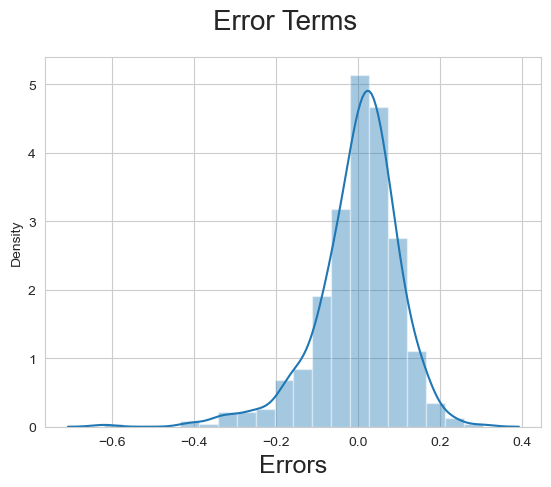

In [63]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [64]:
calculateVIF(X_train_new)

,Features,VIF
3,temp,4.84
2,workingday,4.34
4,windspeed,3.51
0,year,2.01
6,sat,1.76
8,summer,1.57
7,moderate,1.50
9,winter,1.39
5,sept,1.20
1,holiday,1.12


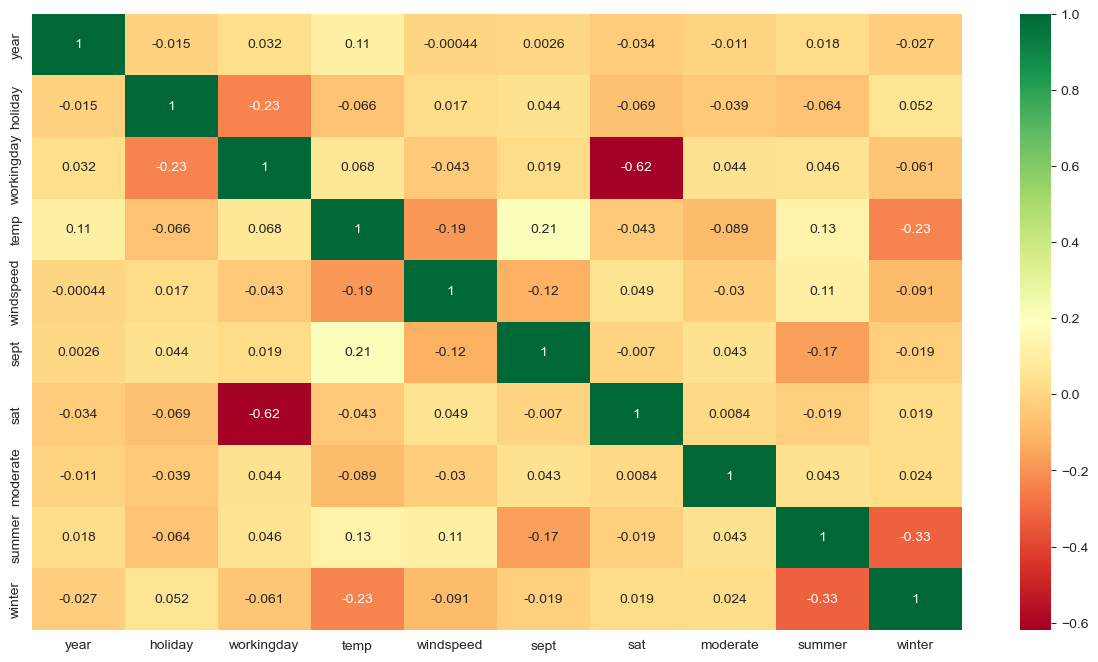

In [65]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

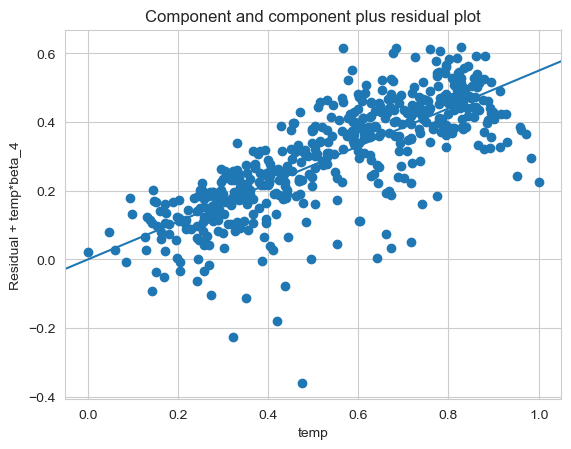

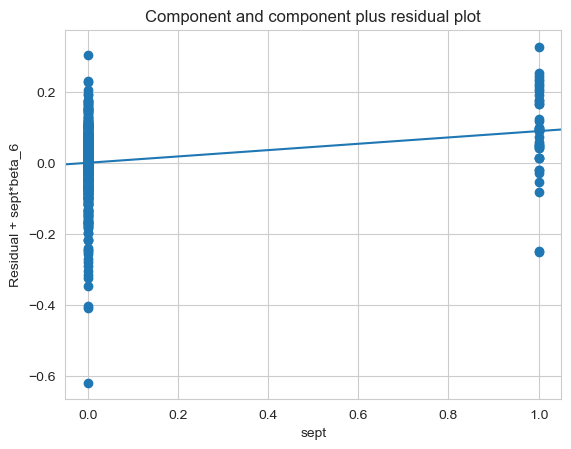

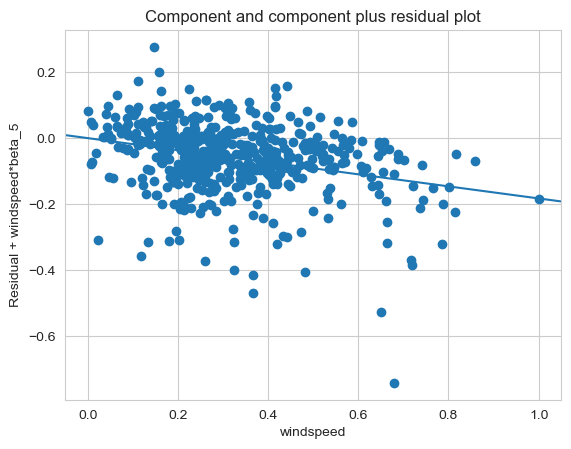

In [66]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_Mdl_5, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_Mdl_5, 'sept')
plt.show()

sm.graphics.plot_ccpr(lr_Mdl_5, 'windspeed')
plt.show()

### Linearity is shown and observed

In [67]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','total_count']
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,total_count,aug,dec,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,1,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,1,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,1,0,0,1,0


In [68]:
y_test = X_test.pop('total_count')


In [69]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [70]:
y_pred = lr_Mdl_5.predict(X_test_lm_5)

In [71]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7704

### Building Linear Model

In [72]:
round(lr_Mdl_5.params,4)

const         0.0867
year          0.2387
holiday      -0.0486
workingday    0.0407
temp          0.5495
windspeed    -0.1831
sept          0.0893
sat           0.0518
moderate     -0.0667
summer        0.0881
winter        0.1163
dtype: float64

In [73]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7594


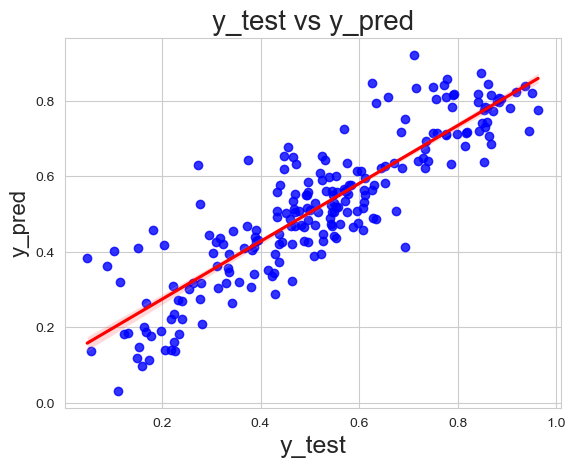

In [74]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

#### Training and Testing dataset Detail:
* Train dataset R^2          : 0.792
* Test dataset R^2           : 0.7704
* Train dataset Adjusted R^2 : 0.788    
* Test dataset Adjusted R^2  : 0.7594

### Final Observation
##### Following Variables are significant to predict the demand for shared bikes

* holiday
* workingday
* temp
* windspeed
* sept
* Sat
* weedspeed
* Moderate
* summer
* winter

#### The year, holiday, working day, temperature, wind speed, Sept, moderate, summer, and winter all affect how many bikes are in demand.